In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 




# Let's get started

## Read dataset from file

In [2]:
data = pd.read_csv('winequality-red.csv')

## Look at information on a dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [65]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## I think that the target variable is 'quality'
### Consider the distribution of values of the target variable

In [22]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### As well as graphically

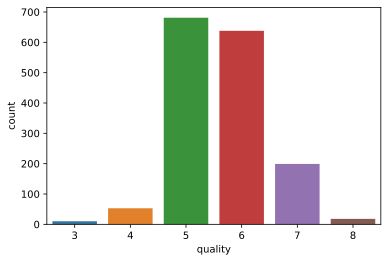

In [23]:
sns.countplot(data['quality']);

## Find variables affecting the target variable
### Make a correlation table

In [25]:
data.corr().style.set_precision(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.124
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.391
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110,0.226
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.014
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221,-0.129
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069,-0.051
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206,-0.185
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.149,-0.496,-0.175
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206,-0.058
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.000,0.094,0.251


### The tightness of the correlation is determined by the correlation coefficient:
### strong -  [± 0.7 to ± 1]
### medium -  [± 0.3 to ± 0.699]
### weak -  [0 to ± 0.299]

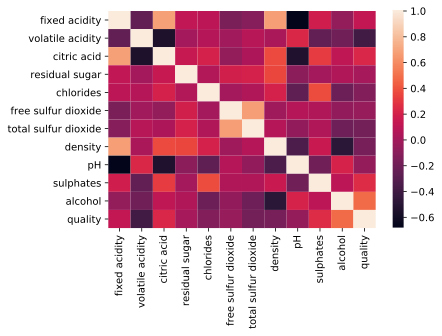

In [26]:
sns.heatmap(data.corr()); # graphically

### 'quality' does not have a strong correlation coefficient with anything, but has a medium level correlation coefficient with 'volatile acidity' and 'alcohol'
### as well as a weak correlation coefficient with all other variables

### In turn, 'volatile acidity' has a medium correlation coefficient with 'critic acid' and 'alcohol' has a medium correlation coefficient with 'density'

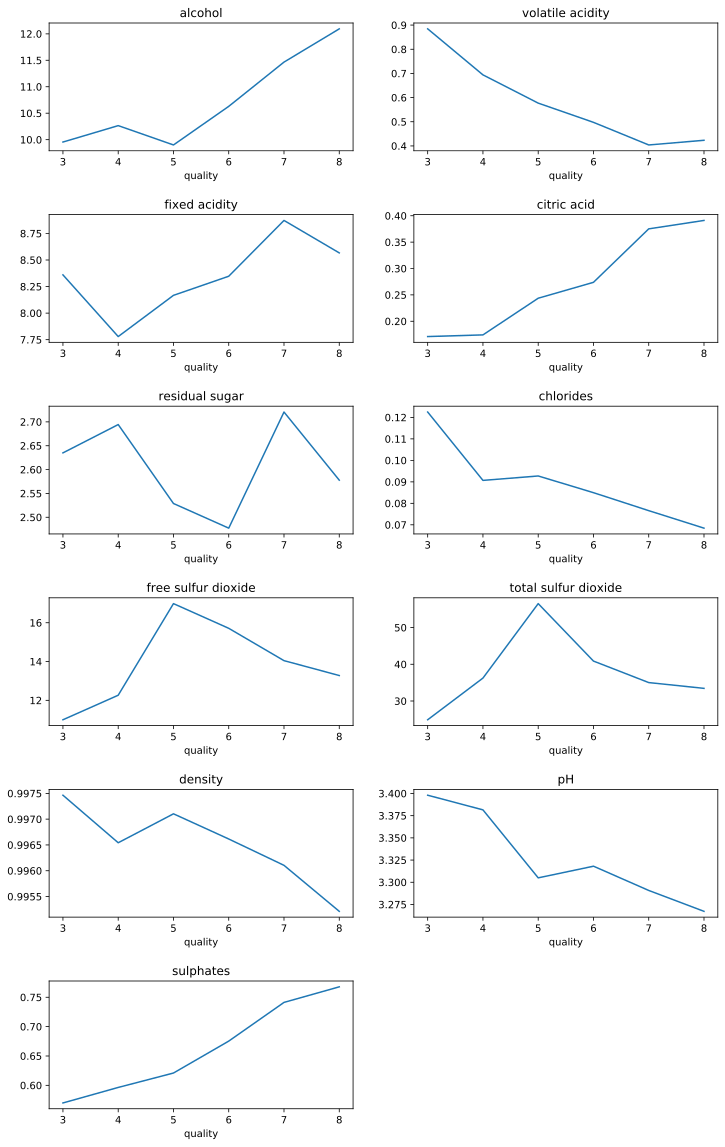

In [73]:
plt.figure(figsize=(12,20))
plt.subplot(6,2,1)
data.groupby('quality')['alcohol'].mean().plot(title="alcohol")
plt.subplot(6,2,2)
data.groupby('quality')['volatile acidity'].mean().plot(title="volatile acidity")
plt.subplot(6,2,3)
data.groupby('quality')['fixed acidity'].mean().plot(title="fixed acidity")
plt.subplot(6,2,4)
data.groupby('quality')['citric acid'].mean().plot(title="citric acid")
plt.subplot(6,2,5)
data.groupby('quality')['residual sugar'].mean().plot(title="residual sugar")
plt.subplot(6,2,6)
data.groupby('quality')['chlorides'].mean().plot(title="chlorides")
plt.subplot(6,2,7)
data.groupby('quality')['free sulfur dioxide'].mean().plot(title="free sulfur dioxide")
plt.subplot(6,2,8)
data.groupby('quality')['total sulfur dioxide'].mean().plot(title="total sulfur dioxide")
plt.subplot(6,2,9)
data.groupby('quality')['density'].mean().plot(title="density")
plt.subplot(6,2,10)
data.groupby('quality')['pH'].mean().plot(title="pH")
plt.subplot(6,2,11)
data.groupby('quality')['sulphates'].mean().plot(title="sulphates")
plt.subplots_adjust(wspace=0.2, hspace=0.5);

### These graphs show the dependencies:
#### - higher alcohol -> higher quality
#### - less volatile acidity -> higher quality
#### - higher citric acid -> higher quality
#### - less chlorides -> higher quality
#### - higher sulphates -> higher quality

### And some anomalies and peaks, such as:
#### - free sulfur dioxide and total sulfur dioxide are peak at 5 quailty
#### - less density -> higher quality, but it's wrong in 5
#### - less ph -> higher quality, but it's wrong in 6



## I think that the dependencies are different on different quality values, since there are anomalies and peaks on the graphs

### I think that the dependencies are different on different quality values, since there are anomalies and peaks on the graphs
### And for a more accurate analysis, it is necessary to break down the parameters into 3 categories:
### - low quality wine - up to 5
### - medium quality wine - from 5 to 6 inclusive
### - high quality wine - more than 6

In [121]:
dataupto5 = (data[data['quality'] < 5])
dataupto5.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,4
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.9965,3.17,1.08,9.2,4
167,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.9956,3.37,0.48,9.0,4


In [123]:
dataupto5.corr().style.set_precision(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.265,0.618,-0.108,0.154,0.183,0.097,0.733,-0.649,0.196,-0.423,-0.130
volatile acidity,-0.265,1.000,-0.512,-0.157,-0.034,-0.160,-0.217,-0.140,0.355,-0.237,0.146,-0.283
citric acid,0.618,-0.512,1.000,0.084,0.483,0.303,0.353,0.486,-0.636,0.513,-0.253,0.006
residual sugar,-0.108,-0.157,0.084,1.000,-0.051,-0.109,0.242,0.051,-0.035,-0.008,0.353,0.013
chlorides,0.154,-0.034,0.483,-0.051,1.000,0.272,0.096,0.244,-0.452,0.735,-0.205,-0.156
free sulfur dioxide,0.183,-0.160,0.303,-0.109,0.272,1.000,0.619,0.155,-0.101,0.425,-0.202,0.051
total sulfur dioxide,0.097,-0.217,0.353,0.242,0.096,0.619,1.000,0.206,-0.176,0.343,-0.125,0.158
density,0.733,-0.140,0.486,0.051,0.244,0.155,0.206,1.000,-0.475,0.330,-0.444,-0.204
pH,-0.649,0.355,-0.636,-0.035,-0.452,-0.101,-0.176,-0.475,1.000,-0.459,0.548,-0.035
sulphates,0.196,-0.237,0.513,-0.008,0.735,0.425,0.343,0.330,-0.459,1.000,-0.149,0.043


In [120]:
dataf5t6i = (data[(data['quality'] >= 5) & (data['quality'] <= 6)])
dataf5t6i.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [124]:
dataf5t6i.corr().style.set_precision(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.225,0.653,0.108,0.096,-0.163,-0.094,0.678,-0.668,0.162,-0.056,0.053
volatile acidity,-0.225,1.000,-0.529,0.014,0.035,-0.011,0.079,-0.013,0.186,-0.209,-0.149,-0.237
citric acid,0.653,-0.529,1.000,0.120,0.217,-0.067,0.059,0.388,-0.503,0.276,0.061,0.080
residual sugar,0.108,0.014,0.120,1.000,0.064,0.237,0.209,0.390,-0.074,0.014,-0.001,-0.018
chlorides,0.096,0.035,0.217,0.064,1.000,0.001,0.060,0.175,-0.276,0.394,-0.203,-0.082
free sulfur dioxide,-0.163,-0.011,-0.067,0.237,0.001,1.000,0.666,-0.028,0.075,0.049,-0.048,-0.061
total sulfur dioxide,-0.094,0.079,0.059,0.209,0.060,0.666,1.000,0.091,-0.083,0.069,-0.218,-0.239
density,0.678,-0.013,0.388,0.390,0.175,-0.028,0.091,1.000,-0.331,0.174,-0.464,-0.135
pH,-0.668,0.186,-0.503,-0.074,-0.276,0.075,-0.083,-0.331,1.000,-0.186,0.221,0.043
sulphates,0.162,-0.209,0.276,0.014,0.394,0.049,0.069,0.174,-0.186,1.000,0.032,0.162


In [122]:
datamt6 = (data[data['quality'] > 6])
datamt6.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7


In [125]:
datamt6.corr().style.set_precision(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.265,0.745,0.195,0.213,-0.158,-0.182,0.782,-0.771,0.156,-0.392,-0.042
volatile acidity,-0.265,1.000,-0.495,0.089,0.073,0.017,0.045,0.008,0.343,-0.208,0.075,0.037
citric acid,0.745,-0.495,1.000,0.277,0.253,-0.070,-0.001,0.516,-0.721,0.186,-0.106,0.023
residual sugar,0.195,0.089,0.277,1.000,0.130,0.018,0.252,0.350,-0.182,-0.125,0.072,-0.029
chlorides,0.213,0.073,0.253,0.130,1.000,-0.180,-0.229,0.345,-0.180,0.129,-0.210,-0.079
free sulfur dioxide,-0.158,0.017,-0.070,0.018,-0.180,1.000,0.660,-0.105,0.120,0.017,0.008,-0.021
total sulfur dioxide,-0.182,0.045,-0.001,0.252,-0.229,0.660,1.000,-0.183,0.050,-0.046,0.137,-0.013
density,0.782,0.008,0.516,0.350,0.345,-0.105,-0.183,1.000,-0.449,0.209,-0.584,-0.112
pH,-0.771,0.343,-0.721,-0.182,-0.180,0.120,0.050,-0.449,1.000,-0.027,0.350,-0.042
sulphates,0.156,-0.208,0.186,-0.125,0.129,0.017,-0.046,0.209,-0.027,1.000,-0.052,0.055
